In [30]:
# Customer Segmentation for E-commerce Personalization

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("C:/Users/Hp/OneDrive/Desktop/MachineLearningInternship/dataset.zip")

df.drop("CustomerID", axis=1, inplace=True)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [31]:
# Select Features
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

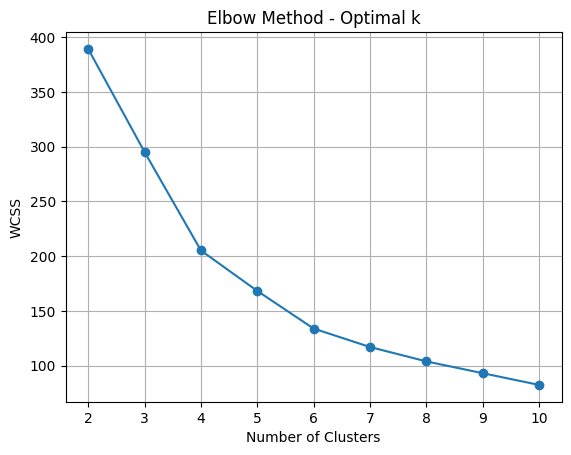

In [32]:
# 4. Elbow Method to Find Optimal Clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [33]:
# 5. Fit KMeans with Optimal k
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(features_scaled)

In [34]:
# 6. Evaluate Clustering Performance
silhouette = silhouette_score(features_scaled, df['Segment'])
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.4166


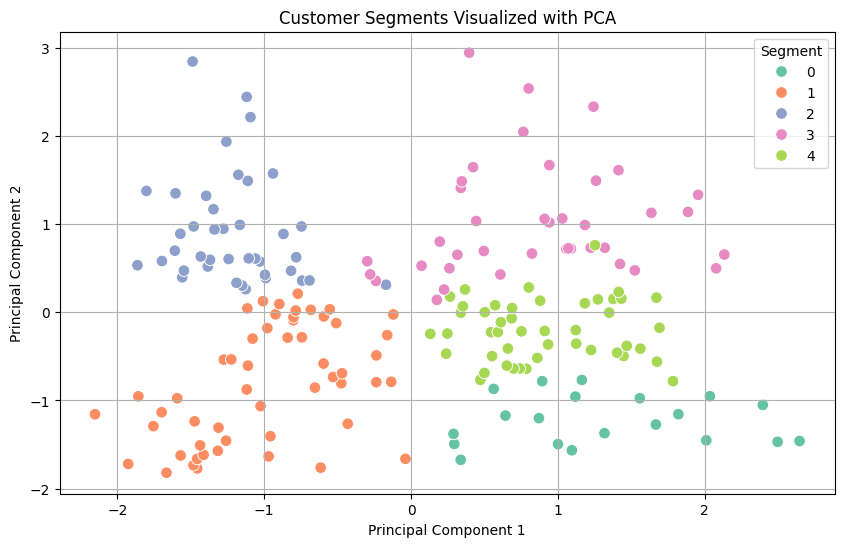

In [35]:
# 7. Reduce to 2D using PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Segment', palette='Set2', s=70)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

In [36]:
# 8. Segment Profiles - Key Characteristics
df.groupby("Segment")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Segment,,,
0,46.25,26.75,18.35
1,25.19,41.09,62.24
2,32.88,86.10,81.53
3,39.87,86.10,19.36
4,55.64,54.38,48.85
